In [4]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Reading the table with the data based around tips at a restaurant

In [5]:
tips = Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


Average male and female tips

In [6]:
male_tips = np.average(tips.where('sex',are.equal_to("Male")).column("tip"))
print(male_tips)
female_tips = np.average(tips.where('sex',are.equal_to("Female")).column("tip"))
print(female_tips)

3.0896178343949043
2.8334482758620685


Histogram of tips based upon sex, then based on time

C:\Users\C20Koby.Hinnant\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


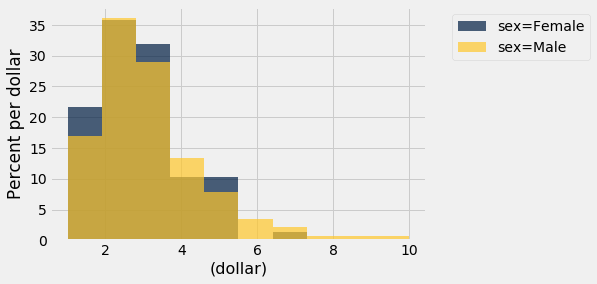

In [7]:
tips.hist("tip",unit = "dollar", group = "sex")

C:\Users\C20Koby.Hinnant\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


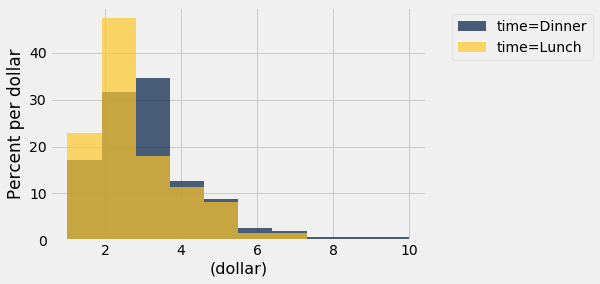

In [8]:
tips.hist("tip",unit = "dollar", group = "time")

Defines a function to convert a day string to its numeric counterpart

In [9]:
def weekday_to_num(day):
    if day == "Mon":
        num = 1
    elif day == "Tue":
        num = 2
    elif day == "Wed":
        num = 3
    elif day == "Thur":
        num = 4
    elif day == "Fri":
        num = 5
    elif day == "Sat":
        num = 6
    elif day == "Sun":
        num = 7
    return num

In [10]:
weekday_to_num("Tue")

2

In [11]:
weekday_to_num("Thur")

4

Applies the day function to the tips table for the day column

In [12]:
tips.apply(weekday_to_num,"day")

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 4])

Function that I'm not entirely sure what it does

In [13]:
def est_tip(bill,window):
    return tips.where('total_bill',are.between(bill-window,bill+window)).column('tip').mean()


In [14]:
est_tip(20,1)

3.143333333333333